# Twitter Web Scraping

Consumer API keys
eVazopG0C6MPuJruABnb9Ojuo (API key)

bRDPy1fV5ROPG5t5bCFtNxyAzbhMqUOz6aLsnhfLpmxUh3SJHs (API secret key)

Access token & access token secret
873805520112459776-R8U5mUVRSs8hnXHYukrvtPe2crmSa7b (Access token)

7qq4TUEeimDlV3KfFPDp2gq030ECb7UnckpcLKuN3mD3j (Access token secret)

Read-only (Access level)

In [3]:
!pip install tweepy

In [4]:
import tweepy

In [1]:
from selenium import webdriver

In [62]:
import matplotlib

In [2]:
import pandas as pd
import numpy as np
import os
browser = webdriver.Chrome('chromedriver.exe')

In [ ]:
url = 'https://https://developer.twitter.com'
browser.get(url)

In [5]:
consumer_key = 'eVazopG0C6MPuJruABnb9Ojuo'
consumer_secret = 'bRDPy1fV5ROPG5t5bCFtNxyAzbhMqUOz6aLsnhfLpmxUh3SJHs'

access_token = '873805520112459776-R8U5mUVRSs8hnXHYukrvtPe2crmSa7b'
access_secret = '7qq4TUEeimDlV3KfFPDp2gq030ECb7UnckpcLKuN3mD3j'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api=tweepy.API(auth,wait_on_rate_limit=True)

# Scraping Modi's Tweets

In [43]:
modi_tweets = api.user_timeline('narendramodi', page=1,count=200)
len(modi_tweets)

200

In [9]:
modi_tweets[0]

Status(_api=<tweepy.api.API object at 0x00000228C9F47CC0>, _json={'created_at': 'Mon Apr 01 03:28:25 +0000 2019', 'id': 1112557299456004097, 'id_str': '1112557299456004097', 'text': 'I bow to His Holiness Dr. Sree Sree Sree Sivakumara Swamigalu on his Jayanti. \n\nHe lives in our hearts and minds.… https://t.co/T6CNMHIDjx', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/T6CNMHIDjx', 'expanded_url': 'https://twitter.com/i/web/status/1112557299456004097', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [115, 138]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Chowkidar Narendra Modi', 'screen_name': 'narendramodi', 'location': 'India', 'descriptio

In [10]:
modi_tweets[0].text

'I bow to His Holiness Dr. Sree Sree Sree Sivakumara Swamigalu on his Jayanti. \n\nHe lives in our hearts and minds.… https://t.co/T6CNMHIDjx'

In [11]:
modi_tweets[0].created_at

datetime.datetime(2019, 4, 1, 3, 28, 25)

In [12]:
import json
modi_tweets[0]._json

{'created_at': 'Mon Apr 01 03:28:25 +0000 2019',
 'id': 1112557299456004097,
 'id_str': '1112557299456004097',
 'text': 'I bow to His Holiness Dr. Sree Sree Sree Sivakumara Swamigalu on his Jayanti. \n\nHe lives in our hearts and minds.… https://t.co/T6CNMHIDjx',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/T6CNMHIDjx',
    'expanded_url': 'https://twitter.com/i/web/status/1112557299456004097',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [115, 138]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 18839785,
  'id_str': '18839785',
  'name': 'Chowkidar Narendra Modi',
  'screen_name': 'narendramodi',
  'location': 'India',
  'description': 'Prime Minister of In

In [13]:
modi_tweets[0].source

'Twitter for iPhone'

In [14]:
modi_tweets[0].user.description

'Prime Minister of India'

In [15]:
print(modi_tweets[0].geo)

None


In [16]:
modi_tweets[0].user.location

'India'

In [44]:
modi_tweets[0].favorite_count

6444

In [45]:
modi_tweets[0].retweet_count

1633

In [46]:
df_modi_tweets = pd.DataFrame()
for tweet in modi_tweets:
    curr_tweet = {
        'text': tweet.text,
        'likes':tweet.favorite_count,
        'retweets':tweet.retweet_count,
        'created_at':tweet.created_at,
        'source':tweet.source
    }
    df_modi_tweets = df_modi_tweets.append(curr_tweet, ignore_index=True)
df_modi_tweets

,created_at,likes,retweets,source,text
0,2019-04-01 03:28:25,6444.0,1633.0,Twitter for iPhone,I bow to His Holiness Dr. Sree Sree Sree Sivak...
1,2019-04-01 03:14:06,3984.0,1074.0,Twitter for iPhone,Utkala Dibasa greetings to my sisters and brot...
2,2019-04-01 03:11:17,3070.0,788.0,Twitter for iPhone,సికింద్రాబాద్... భారత్‌ను మరింత సంపన్నమైన దేశం...
3,2019-04-01 03:09:43,3565.0,886.0,Twitter for iPhone,ఈరోజు నేను రాజమండ్రిలో ఒక ర్యాలీలో మాట్లాడుతున...
4,2019-04-01 03:07:57,10178.0,1919.0,Twitter for iPhone,केंद्र आणि राज्य सरकारने जी लोकाभिमुख कामे केल...
5,2019-04-01 03:07:56,12785.0,2540.0,Twitter for iPhone,महाराष्ट्रातील माझ्या प्रिय बंधू आणि भगिनींना ...
6,2019-03-31 16:35:37,17665.0,5349.0,Twitter Media Studio,आगरा के राजेश वाल्मीकि जी को मेरा नमन!\n\nबड़े...
7,2019-03-31 16:35:19,10219.0,3336.0,Twitter Media Studio,The conduct of our Opposition has angered Indi...
8,2019-03-31 16:34:57,12997.0,3524.0,Twitter Media Studio,आज भारत का हर युवा चाहता है कि देश विकसित बने ...
9,2019-03-31 16:34:47,24812.0,7063.0,Twitter Media Studio,Your vote in 2014:\n\nBrought fear among the c...


In [49]:
df_modi_tweets = pd.DataFrame()
for page in range(1,21):
    modi_tweets = api.user_timeline('narendramodi', page=page,count=200)

    for tweet in modi_tweets:
        curr_tweet = {
            'text': tweet.text,
            'likes':tweet.favorite_count,
            'retweets':tweet.retweet_count,
            'created_at':tweet.created_at,
            'source':tweet.source
        }
        df_modi_tweets = df_modi_tweets.append(curr_tweet, ignore_index=True)


In [50]:
df_modi_tweets.shape

(3215, 5)

In [51]:
df_modi_tweets.to_csv('narendramodi_tweets.csv',index=False,encoding='utf-8')

In [52]:
os.getcwd()

'D:\\DSW\\Day1'

# Twitter Analysis

In [53]:
df_modi_tweets['source'].value_counts()

Twitter Web Client      1633
Twitter Media Studio     741
Twitter for iPhone       535
Periscope                213
Twitter for Android       92
Twitter Ads Composer       1
Name: source, dtype: int64

In [56]:
df_modi_tweets.sort_values(by='likes',ascending=False).head(1)

,created_at,likes,retweets,source,text
357,2019-03-01 16:34:29,271910.0,66477.0,Twitter for iPhone,Welcome Home Wing Commander Abhinandan!\n\nThe...


In [58]:
df_modi_tweets['date']=pd.to_datetime(
             df_modi_tweets['created_at'])
df_modi_tweets['date'].head()

0   2019-04-01 03:28:25
1   2019-04-01 03:14:06
2   2019-04-01 03:11:17
3   2019-04-01 03:09:43
4   2019-04-01 03:07:57
Name: date, dtype: datetime64[ns]

In [60]:
#min date #max date
df_modi_tweets['date'].min(), df_modi_tweets['date'].max()

(Timestamp('2018-06-21 10:36:05'), Timestamp('2019-04-01 03:28:25'))

In [65]:
df_modi_tweets['hour'] = df_modi_tweets['date'].dt.hour
df_modi_tweets['hour'].value_counts().sort_index().head()

0     13
1     52
2    138
3    126
4     82
Name: hour, dtype: int64

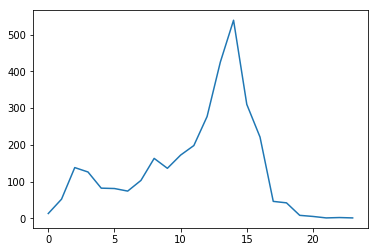

In [63]:
%matplotlib inline
df_modi_tweets['hour'] = df_modi_tweets['date'].dt.hour
df_modi_tweets['hour'].value_counts().sort_index().plot.line()

In [66]:
from pytz import timezone
#india_timezone = pytz.timezone('Asia/Calcutta')
#df_modi_tweets['date'].apply(lambda v: indian.localize(v)).dt.hour

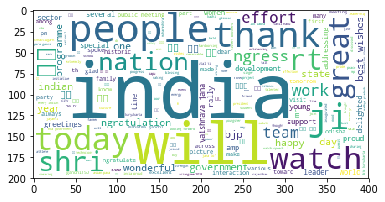

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
docs = df_modi_tweets['text'].str.lower()
docs = docs.str.replace('co','').str.replace('https','')
wc = WordCloud(background_color='white').generate(' '.join(docs))
plt.imshow(wc)

# To Identify the frequency of each and every hashtag used by modi
- Create a empty list called as 'hashtag'
- Loop through each tweet
- Break tweet in words by split string by space
- Identify if a word startswith #
- If so, append the word to 'hashtags' list
- Convert list to Series and use values_counts to get frequency of each hashtag
- plot it into matplotlib to visualize top 10 hastags using horizontal bar chart

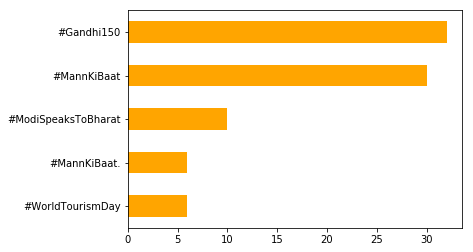

In [71]:
hashtags=[]
for tweet in df_modi_tweets['text']:
    words = tweet.split(' ')
    tags = [word for word in words if word.startswith('#')]
    hashtags.extend(tags)
pd.Series(hashtags).value_counts().head()[::-1].plot.barh(color='orange')

# What is the frequency of hashtag on various months

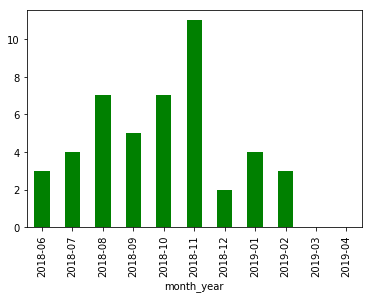

In [84]:
df_modi_tweets['month_year'] = df_modi_tweets['date'].dt.strftime('%Y-%m')

df_modi_tweets['mannkibaat']=df_modi_tweets['text'].apply(lambda text: 1 if '#MannKiBaat' in text else 0)
#df_modi_tweets[['month','mannkibaat']].head()
df_modi_tweets.groupby('month_year')['mannkibaat'].sum().plot.bar(color='green')

In [76]:
df_modi_tweets['day'] = df_modi_tweets['date'].dt.day

df_modi_tweets['weekday'] = df_modi_tweets['date'].dt.strftime('%A')
df_modi_tweets['hour'] = df_modi_tweets['date'].dt.hour

In [78]:
summary = df_modi_tweets.groupby(
    ['month_year','day']).size().reset_index()
summary = summary.rename(columns={0: 'count'})
summary_pivot = summary.pivot_table(index='month_year',
                                   columns='day',
                                   values='count') 
summary_pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month_year,,,,,,,,,,,,,,,,,,,,,
2018-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,10.0,3.0,19.0,8.0,9.0,7.0,4.0,NaN
2018-07,9.0,3.0,2.0,9.0,2.0,5.0,6.0,2.0,8.0,8.0,...,7.0,7.0,10.0,8.0,10.0,7.0,5.0,18.0,5.0,2.0
2018-08,5.0,6.0,8.0,1.0,2.0,5.0,13.0,2.0,8.0,8.0,...,7.0,13.0,7.0,6.0,19.0,9.0,10.0,14.0,10.0,19.0
2018-09,13.0,6.0,7.0,49.0,25.0,3.0,5.0,2.0,1.0,7.0,...,11.0,8.0,2.0,16.0,6.0,22.0,8.0,13.0,20.0,NaN
2018-10,4.0,40.0,10.0,13.0,8.0,14.0,7.0,3.0,8.0,9.0,...,11.0,14.0,16.0,7.0,10.0,11.0,13.0,11.0,14.0,27.0
2018-11,11.0,15.0,7.0,7.0,14.0,10.0,9.0,6.0,10.0,7.0,...,6.0,12.0,16.0,26.0,21.0,19.0,13.0,5.0,14.0,NaN
2018-12,23.0,3.0,17.0,13.0,11.0,2.0,7.0,1.0,7.0,7.0,...,8.0,15.0,15.0,13.0,5.0,6.0,10.0,11.0,22.0,10.0
2019-01,4.0,9.0,13.0,13.0,12.0,5.0,1.0,14.0,13.0,3.0,...,8.0,13.0,31.0,15.0,8.0,15.0,15.0,17.0,13.0,2.0
2019-02,3.0,12.0,16.0,3.0,2.0,1.0,8.0,15.0,17.0,19.0,...,13.0,13.0,22.0,14.0,7.0,1.0,1.0,NaN,NaN,NaN


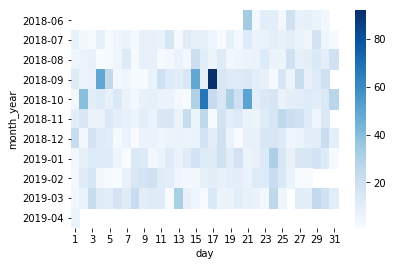

In [80]:
import seaborn as sns
sns.heatmap(summary_pivot, cmap='Blues')

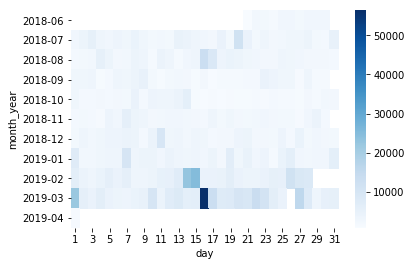

In [82]:
summary = df_modi_tweets.groupby(
    ['month_year','day'])['retweets'].mean().reset_index()
summary = summary.rename(columns={0: 'retweets'})
summary_pivot = summary.pivot_table(index='month_year',
                                   columns='day',
                                   values='retweets') 

import seaborn as sns
sns.heatmap(summary_pivot, cmap='Blues')

# Twitter Scrapping for a hashtag/search Term

In [85]:
tweets = api.search('#ModiMatBanao',count=200)
len(tweets)

87

In [110]:
#tweets[0]._json 
tweets_df=pd.DataFrame()
for tweet in tweepy.Cursor(api.search, '#ModiMatBanao').items():
    #for tweet in tweets:
        #print(tweet.user.location)
        #print(tweet.user.name, tweet.user.screen_name)
        #print(tweet.user.friends_count, tweet.user.description)
        #print(tweet)
        curr_tweet = {
            'display_name':tweet.user.name,
            'handler_name':tweet.user.screen_name,
            'text':tweet.text,
            'created_at':tweet.created_at,
            'followers':tweet.user.followers_count,
            'friends':tweet.user.friends_count,
            'user_description': tweet.user.description,
            'user_location':tweet.user.location,
            'likes':tweet.favorite_count,
            'retweets':tweet.retweet_count,
        }
        tweets_df=tweets_df.append(curr_tweet, ignore_index=True)
tweets_df

TweepError: Twitter error response: status code = 429

In [132]:
import numpy as np

locations = tweets_df['user_location'].replace('', np.NaN)
locations

0                    kapasan Rajasthan 
1                                   NaN
2                         Mumbai, India
3                                 India
4                      Bengaluru, India
5                                   NaN
6                  Al Farwaniya, Kuwait
7                                 India
8                                   NaN
9                        Naugarh, India
10                                  NaN
11                                  NaN
12                                  NaN
13                                  NaN
14                     New Delhi, India
15                                Qatar
16                                  NaN
17       Bettiah, West Champaran, Bihar
18                                  NaN
19           Fatehpur(U.P.),DEL,CCU,RAJ
20              Asansol , Jamui , India
21       Bettiah, West Champaran, Bihar
22                                  NaN
23                          Kota, India
24                  Non Reliable Indian


In [112]:
tweets_df.to_csv('narendramodi_tweets2.csv',index=False,encoding='utf-8')

In [138]:
locations.head(50)

0                 kapasan Rajasthan 
1                                NaN
2                      Mumbai, India
3                              India
4                   Bengaluru, India
5                                NaN
6               Al Farwaniya, Kuwait
7                              India
8                                NaN
9                     Naugarh, India
10                               NaN
11                               NaN
12                               NaN
13                               NaN
14                  New Delhi, India
15                             Qatar
16                               NaN
17    Bettiah, West Champaran, Bihar
18                               NaN
19        Fatehpur(U.P.),DEL,CCU,RAJ
20           Asansol , Jamui , India
21    Bettiah, West Champaran, Bihar
22                               NaN
23                       Kota, India
24               Non Reliable Indian
25                       Kota, India
26                    Narnaul, India
2

In [141]:
import requests
loc_df=pd.DataFrame()
for city in locations:
    if (city=='NaN' or city=='Somewhere'):
        continue
    else:
        loc = city
        weather_api_key: '05582cd0928c400887383648191103'
        url = 'http://api.apixu.com/v1/current.json?key=05582cd0928c400887383648191103&q=%s' %loc
        result = requests.get(url).json()
        latitude = result['location']['lat']
        longitude = result['location']['lon']
    
        loc_dict = {'City':city,
                    'latitude':latitude,
                    'longitude':longitude
                    
                    }
        loc_df= loc_df.append(loc_dict, ignore_index=True)
        
    
loc_df

KeyError: 'location'

In [126]:
result

{'error': {'code': 1003, 'message': 'Parameter q is missing.'}}

In [142]:
loc_df

,City,latitude,longitude
0,kapasan Rajasthan,24.90,74.33
1,NaN,-17.76,177.44
2,"Mumbai, India",18.98,72.83
3,India,28.60,77.20
4,"Bengaluru, India",12.98,77.58
5,NaN,-17.76,177.44
6,"Al Farwaniya, Kuwait",29.37,47.98
7,India,28.60,77.20
8,NaN,-17.76,177.44
9,"Naugarh, India",24.83,83.27
